In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

input_size=784 #as image is 28*28
no_of_classes=10
hidden_size=100
batch_size=100
no_of_epochs=2
learning_rate=0.001




In [2]:
#import MNIST DATA
train_dataset=torchvision.datasets.MNIST(root="/data",train=True,transform=transforms.ToTensor(),download=True)
test_dataset=torchvision.datasets.MNIST(root="/data",train=False,transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /data/MNIST/raw/train-images-idx3-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /data/MNIST/raw/train-labels-idx1-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /data/MNIST/raw/t10k-images-idx3-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
print(train_dataset)
print("\n")
print(test_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: /data
    Split: Train
    StandardTransform
Transform: ToTensor()


Dataset MNIST
    Number of datapoints: 10000
    Root location: /data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [4]:
print(dir(train_dataset))
print(len(train_dataset))
print(len(train_dataset.train_data))

print(train_dataset.targets)
print(train_dataset.targets.bincount())#distribution of labels


['__add__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_check_exists', '_format_transform_repr', '_repr_indent', 'class_to_idx', 'classes', 'data', 'download', 'extra_repr', 'mirrors', 'processed_folder', 'raw_folder', 'resources', 'root', 'target_transform', 'targets', 'test_data', 'test_file', 'test_labels', 'train', 'train_data', 'train_labels', 'training_file', 'transform', 'transforms']
60000
60000
tensor([5, 0, 4,  ..., 5, 6, 8])
tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [5]:
print(dir(test_dataset))
print(len(test_dataset))
print(len(test_dataset.test_data))

print(test_dataset.targets)
print(test_dataset.targets.bincount())#distribution of labels

['__add__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_check_exists', '_format_transform_repr', '_repr_indent', 'class_to_idx', 'classes', 'data', 'download', 'extra_repr', 'mirrors', 'processed_folder', 'raw_folder', 'resources', 'root', 'target_transform', 'targets', 'test_data', 'test_file', 'test_labels', 'train', 'train_data', 'train_labels', 'training_file', 'transform', 'transforms']
10000
10000
tensor([7, 2, 1,  ..., 4, 5, 6])
tensor([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


Basically iter() calls the __iter__() method  which returns an iterator. next() then calls the __next__() method on that iterator to get the first iteration. Running next() again will get the second item of the iterator, etc.

This logic often happens 'behind the scenes', for example when running a for loop. It calls the __iter__() method on the iterable, and then calls __next__() on the returned iterator until it reaches the end of the iterator. It then raises a stopIteration and the loop stops.

In [7]:
#Dataloader 
#checking contents of first batch
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
train_loader_iter=iter(train_loader)
print(len(train_loader_iter))#total 60000/batch size=100 , so no of batches  is 600. train_loader_iter will contain 600 batches 

#to check data of 1st batch
first_batch=train_loader_iter.next()
print(type(first_batch))#<class 'list'>
print(len(first_batch))#length is 2 as batch is list of features and  targets

data,target=first_batch
print(len(data))#100 , 100 tensors will be there. each tensor will be of size 28*28
print(data.shape)#torch.Size([100, 1, 28, 28]) , 100 depitcs its batch size of 100 , 1 is due to presence of once channel(no color channel)
print(type(data))#<class 'torch.Tensor'>

print(data[0])#<class 'torch.Tensor'> ,this will be 28*28 in size.
print(len(data[0]))#1
print(data[0].shape)#torch.Size([1, 28, 28])
print(type(data[0]))#<class 'torch.Tensor'>



print("\n\n",data)#all 100 will be printed
print(target)


600
<class 'list'>
2
100
torch.Size([100, 1, 28, 28])
<class 'torch.Tensor'>
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.00

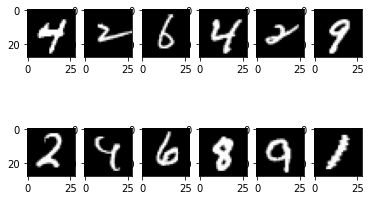

In [8]:
#visualising 1st batch, 12 images
for i in range(12):
  plt.subplot(2,6,i+1)

  plt.imshow(data[i][0],cmap='gray')
plt.show()   

In [9]:
class NeuralNet(nn.Module):

  def __init__(self,input_size,hidden_size,no_of_classes):
    super(NeuralNet,self).__init__()
    self.l1=nn.Linear(input_size,hidden_size)# 1st layer to which input is given
    self.relu=nn.ReLU()#activation function applied to above layer

    self.l2=nn.Linear(hidden_size,no_of_classes)#2nd layer which receives output(applying activation) of 1st layer as input
    #no activation to second layer is defined as softmax will be applied


    #defining forward pass
  def forward(self,x):
    out=self.l1(x) 
    out=self.relu(out)
    out=self.l2(out)
    return out

model=NeuralNet(input_size,hidden_size,no_of_classes)  

#loss
criterion=nn.CrossEntropyLoss()#

#optimize
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)


In [10]:

#training loop for 1 batch and checking details


for ind , (images,labels) in enumerate(train_loader):
      
      print(images.shape)# torch.Size([100, 1, 28, 28]) as expected one batch is of 100 size 
      print(labels.shape) #torch.Size([100]) 
      
      images=images.reshape(-1,28*28)
      print(images.shape)# torch.Size([100, 784], this is done as input layer input is 28*28=784 and 100 is due to batch size

      print("\n\nbelow are model parameters and thier initial values ::-> ")
      for name,param in model.named_parameters():
          print(name,param.grad_fn,param)  #param will be having values and name will have name
      #forward pass
      outputs=model(images)
      print("\noutputs shape:",outputs.shape)# torch.Size([100, 10]), there are 100 images and 2nd layer has 10 neurons as op (no of classes)
      #loss
      loss=criterion(outputs,labels)
      print("\nloss calulated:",loss,"\n")

      #backward pass
      optimizer.zero_grad()# zero down all gradients
  
      print("all model parameters that will be affected and whose gradient will be calculated w.r.t. loss and optimised next")
  
      loss.backward()
     
      #print(param) #to see the param value
      print("\n\n checking the gradient calculated for l2.weight :\n",)
      for name,param in model.named_parameters():
        if (name == 'l2.weight'):
          print(name,param.grad)#param.grad will have gradients calculated for it after backward()

      optimizer.step()#apply changes to model.parameters after applying chnages calculated through gradient.
      
      break

print("\n\n---------------checking output------------------")
print("\ntype(output) :\n",type(outputs))

print("\noutput[0] of 1st batch :\n",outputs[0])

print("\nshape(output) :\n",outputs.shape)

print("\noutput of 1st batch :\n",outputs)


torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 784])


below are model parameters and thier initial values ::-> 
l1.weight None Parameter containing:
tensor([[ 1.1271e-02, -2.8344e-02,  2.4168e-02,  ...,  3.3818e-02,
          2.4818e-03, -3.3917e-02],
        [-2.3246e-02, -2.3210e-03, -1.2769e-02,  ...,  1.5260e-02,
          3.2059e-02, -3.3864e-02],
        [ 9.4322e-03,  2.4355e-02,  2.9097e-02,  ...,  1.0174e-02,
         -2.7639e-02, -4.1886e-03],
        ...,
        [-1.6866e-02,  2.8254e-02, -1.8602e-02,  ..., -1.1163e-02,
          2.5404e-05, -1.2640e-02],
        [ 4.6241e-04, -1.5827e-02,  9.5472e-03,  ..., -1.1369e-02,
         -9.2196e-03,  8.1091e-03],
        [-3.3899e-03,  3.2414e-02,  2.6047e-02,  ...,  9.4944e-03,
          1.3241e-02,  1.5252e-02]], requires_grad=True)
l1.bias None Parameter containing:
tensor([-7.1228e-04,  2.9608e-02, -3.0287e-02, -1.8544e-02,  4.6349e-03,
        -7.0995e-03,  3.2236e-02,  2.3880e-02,  2.9697e-02, -3.3745e-02,


In [11]:

#training loop for all batch and checking details

for epoch in range(no_of_epochs):
  for ind , (images,labels) in enumerate(train_loader):
      
      #reshaping
      images=images.reshape(-1,28*28)

      #forward pass
      outputs=model(images)
      #loss
      loss=criterion(outputs,labels)
      #backward pass
      optimizer.zero_grad()# zero down all gradients
      loss.backward()
      #optimizer step 
      optimizer.step()#apply changes to model.parameters after applying chnages calculated through gradient.
      
      if (ind + 1) %50 ==0:
        print("epoch no:{}/{} ,batch_no:{},loss:{:.4f}".format(epoch,no_of_epochs,ind,loss))



epoch no:0/2 ,batch_no:49,loss:0.8442
epoch no:0/2 ,batch_no:99,loss:0.4781
epoch no:0/2 ,batch_no:149,loss:0.3401
epoch no:0/2 ,batch_no:199,loss:0.3010
epoch no:0/2 ,batch_no:249,loss:0.4515
epoch no:0/2 ,batch_no:299,loss:0.2208
epoch no:0/2 ,batch_no:349,loss:0.1271
epoch no:0/2 ,batch_no:399,loss:0.2451
epoch no:0/2 ,batch_no:449,loss:0.2496
epoch no:0/2 ,batch_no:499,loss:0.3225
epoch no:0/2 ,batch_no:549,loss:0.3029
epoch no:0/2 ,batch_no:599,loss:0.2091
epoch no:1/2 ,batch_no:49,loss:0.1026
epoch no:1/2 ,batch_no:99,loss:0.1023
epoch no:1/2 ,batch_no:149,loss:0.2886
epoch no:1/2 ,batch_no:199,loss:0.3135
epoch no:1/2 ,batch_no:249,loss:0.2840
epoch no:1/2 ,batch_no:299,loss:0.1406
epoch no:1/2 ,batch_no:349,loss:0.1508
epoch no:1/2 ,batch_no:399,loss:0.0953
epoch no:1/2 ,batch_no:449,loss:0.1155
epoch no:1/2 ,batch_no:499,loss:0.1791
epoch no:1/2 ,batch_no:549,loss:0.2637
epoch no:1/2 ,batch_no:599,loss:0.2767


In [22]:
print(dir(test_dataset))
print(len(test_dataset))

['__add__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_check_exists', '_format_transform_repr', '_repr_indent', 'class_to_idx', 'classes', 'data', 'download', 'extra_repr', 'mirrors', 'processed_folder', 'raw_folder', 'resources', 'root', 'target_transform', 'targets', 'test_data', 'test_file', 'test_labels', 'train', 'train_data', 'train_labels', 'training_file', 'transform', 'transforms']
10000


In [26]:
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=True)

with torch.no_grad(): #this block will be excluded from graph 
  n_correct=0
  n_samples=0


  for (images ,labels) in test_loader:
    images=images.reshape(-1,28*28)

    outputs=model(images)

    #value,index
    _,predictions=torch.max(outputs,1)
    n_samples += labels.shape[0] #this gives no of samples in current batch adds iteratively
    n_correct += (predictions == labels ).sum().item() #this gives no of correct output samples in current batch adds iteratively

  accuracy=100* n_correct / n_samples
  print("accuracy is  {} ".format(accuracy))



accuracy is  95.28 


In [29]:
#checking results on one batch

n_correct=0
n_samples=0
with torch.no_grad():
 for (t_images,t_labels) in test_loader:
  t_images=t_images.reshape(-1,28*28)
  t_output=model(t_images)
 
  #value,index
  value,predictions=torch.max(t_output,1)
  n_samples += t_labels.shape[0]
  n_correct +=(predictions == t_labels).sum().item()

  print("shape(t_images) :: ",t_images.shape) # here will be 100 images in one batch
  print("shape(t_labels) :: ",t_labels.shape)#100 corresponding labels
  print("shape(t_output) :: ",t_output.shape)#100 outputs with 10 values in each as there are 10 diffrenet classes defined
  break
accuracy= (n_correct/n_samples)*100

shape(t_images) ::  torch.Size([100, 784])
shape(t_labels) ::  torch.Size([100])
shape(t_output) ::  torch.Size([100, 10])


In [30]:

for i in zip(value,predictions):
  print(i)

#value determines highest value that is obatined among 10 output classes
#crossentropyloss is used in this , so by mathematics loss will be less when log(predicted value) will be maximum.

(tensor(7.6107), tensor(6))
(tensor(8.6740), tensor(4))
(tensor(4.5123), tensor(9))
(tensor(3.7026), tensor(2))
(tensor(5.2809), tensor(9))
(tensor(8.2937), tensor(3))
(tensor(3.5668), tensor(3))
(tensor(7.9052), tensor(8))
(tensor(4.3520), tensor(3))
(tensor(6.8013), tensor(3))
(tensor(8.9290), tensor(6))
(tensor(3.1484), tensor(4))
(tensor(7.7526), tensor(2))
(tensor(9.4867), tensor(6))
(tensor(7.2661), tensor(8))
(tensor(6.0765), tensor(5))
(tensor(8.6804), tensor(6))
(tensor(6.6012), tensor(2))
(tensor(5.0600), tensor(7))
(tensor(6.6299), tensor(6))
(tensor(7.3109), tensor(3))
(tensor(5.9166), tensor(9))
(tensor(7.3571), tensor(7))
(tensor(4.9220), tensor(1))
(tensor(6.9441), tensor(1))
(tensor(6.8948), tensor(8))
(tensor(8.0351), tensor(3))
(tensor(7.2902), tensor(3))
(tensor(4.1249), tensor(1))
(tensor(5.8796), tensor(1))
(tensor(8.4201), tensor(6))
(tensor(12.4229), tensor(0))
(tensor(13.6015), tensor(2))
(tensor(9.0704), tensor(3))
(tensor(6.2174), tensor(1))
(tensor(5.5960), t